In [3]:
!module list

Currently Loaded Modulefiles:
  1) archive/2020-11       3) py-bluepysnap/0.6.1   5) py-efel/3.0.80
  2) python/3.7.4          4) py-bluepy/0.14.15     6) julia/1.5.2


In [1]:
!module list

Currently Loaded Modulefiles:
  1) archive/2020-11       3) py-bluepysnap/0.6.1   5) py-efel/3.0.80
  2) python/3.7.4          4) py-bluepy/0.14.15     6) julia/1.5.2


In [1]:
from bluepy.v2 import Simulation

import efel

from bluepy.v2 import Circuit
from bluepy.v2 import Cell
#from bluepy.v2.enums import Synapse

#from os import path

import pandas as pd

import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import pickle as pkl

#import h5py

pd.set_option('display.max_columns', 500)

In [2]:
import matplotlib
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [3]:
c = Circuit('/gpfs/bbp.cscs.ch/project/proj64/circuits/O1.v6a/20181207/CircuitConfig')
mc2_cells = c.cells.get({'$target': 'mc2_Column'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.LAYER,Cell.MTYPE,Cell.ETYPE])
mc2gidsids = {k: v for k, v in enumerate(mc2_cells.index)}

mc2_cells_full = c.cells.get({'$target': 'mc2_Column'})

In [4]:
mc2_cells = mc2_cells.reset_index()

mc2_cells = mc2_cells.rename(columns = {'index':'gid'})

In [5]:
#glut = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/gen1exc_outs_r_glut_2021022821.txt",sep='\t',header=None)
#gaba = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/gen1exc_outs_r_gaba_2021022821.txt",sep='\t',header=None)

glut = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/new50_ca1p25_gen_thal_outs_r_glut_2021031311.txt",sep='\t',header=None)
gaba = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/new50_ca1p25_gen_thal_outs_r_gaba_2021031311.txt",sep='\t',header=None)


glut.columns = ['idxm','c_gid','glut_releases_per_pre']
gaba.columns = ['idxm','c_gid','gaba_releases_per_pre']


In [6]:
#postglut = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/gen1exc_ins_r_glut_2021022821.txt",sep='\t',header=None)
#postgaba = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/gen1exc_ins_r_gaba_2021022821.txt",sep='\t',header=None)

postglut = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/new50_ca1p25_gen_thal_ins_r_glut_2021031311.txt",sep='\t',header=None)
postgaba = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/new50_ca1p25_gen_thal_ins_r_gaba_2021031311.txt",sep='\t',header=None)

postglut.columns = ['idxm','rank','c_gid','glut_releases_received_per_post']
postgaba.columns = ['idxm','rank','c_gid','gaba_releases_received_per_post']


In [7]:
releases_pre = pd.merge(glut,gaba,how='inner',on=['idxm','c_gid'])
releases_post = pd.merge(postglut,postgaba,how='inner',on=['idxm','c_gid'])

releases_all = pd.merge(releases_pre,releases_post,how='inner',on=['idxm','c_gid'])

In [8]:
releases_all = releases_all.drop(columns=['rank_x','rank_y'])

In [9]:
releases_all.head()

,idxm,c_gid,glut_releases_per_pre,gaba_releases_per_pre,glut_releases_received_per_post,gaba_releases_received_per_post
0,0,292,231.0,0.0,68.0,19.0
1,0,443,232.0,0.0,91.0,36.0
2,0,468,446.0,0.0,36.0,3.0
3,0,469,124.0,0.0,25.0,10.0
4,0,779,255.0,0.0,189.0,80.0


In [10]:
releases_all['idxm'].unique()  # !!! because if idxm % 10 == 0:  with open(

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48])

In [11]:
len(releases_all['c_gid'].unique())

22918

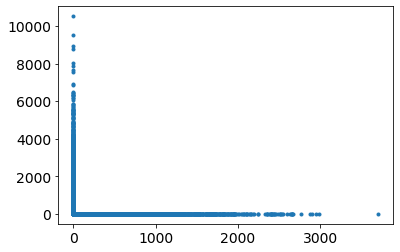

In [12]:
plt.plot(releases_all['glut_releases_per_pre'],releases_all['gaba_releases_per_pre'],'.')
plt.show()

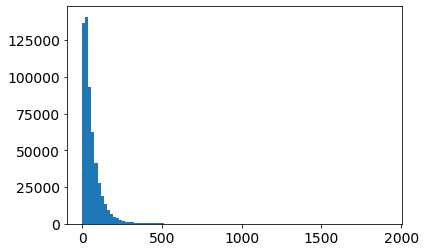

In [13]:
plt.hist(postglut['glut_releases_received_per_post'],bins = 100)
plt.show()

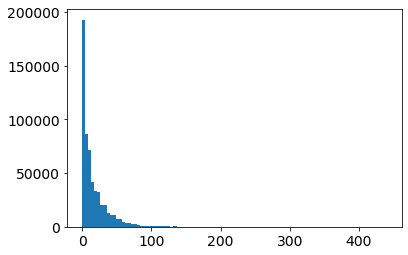

In [14]:
plt.hist(postgaba['gaba_releases_received_per_post'],bins = 100)
plt.show()

In [15]:
#param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/gen1exc_param_2021022821.txt",header=None,sep = "\t") 
param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/new50_ca1p25_gen_thal_param_2021031311.txt",header=None,sep = "\t") 



param.columns = ['c_gid','rank','idxm',
                 'ina_density', 'const_ksi', 'voltages_per_gids', 'nais_mean', 'kis_mean', 
                 'ik_density', 'const41','pAKTPFK2', 'atpi_mean','atp_vm27','cais_mean','mito_scale','glutamatergic_gaba_scaling','outs_r_to_met','cells_volumes_um3']


In [16]:
releases_params = pd.merge(param,releases_all,how='inner',on=['idxm','c_gid'])

In [17]:
releases_params.head()

,c_gid,rank,idxm,ina_density,const_ksi,voltages_per_gids,nais_mean,kis_mean,ik_density,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met,cells_volumes_um3,glut_releases_per_pre,gaba_releases_per_pre,glut_releases_received_per_post,gaba_releases_received_per_post
0,15743,2210,0,-0.016264,0.06,-65.0,10.421062,139.338144,0.044112,4.1,0.17,1.052571,1.626285,0.000109,0.826873,0.1,0.000014,1908.906965,208.0,0.0,47.0,9.0
1,15678,2201,0,-0.003856,0.06,-65.0,10.219913,139.662667,0.002758,4.1,0.17,0.190396,1.195198,0.000089,0.826873,0.1,0.000001,3212.406935,35.0,0.0,86.0,32.0
2,15909,2229,0,-0.002966,0.06,-65.0,10.390305,139.380777,0.009856,4.1,0.17,0.511068,1.355534,0.000121,0.826873,0.1,0.000009,2263.963179,145.0,0.0,69.0,9.0
3,15842,2222,0,-0.015149,0.06,-65.0,10.240057,139.633863,0.006924,4.1,0.17,0.801226,1.500613,0.000098,0.826873,0.1,0.000011,2259.555329,189.0,0.0,77.0,34.0
4,15787,2216,0,-0.005923,0.06,-65.0,10.121221,139.826142,0.003959,4.1,0.17,0.916578,1.558289,0.000094,0.826873,0.1,0.000002,6441.045916,117.0,0.0,115.0,40.0


In [18]:
releases_params = pd.merge(releases_params,mc2_cells.loc[:,['gid','synapse_class', 'layer', 'mtype', 'etype']],how='inner',left_on='c_gid',right_on='gid')

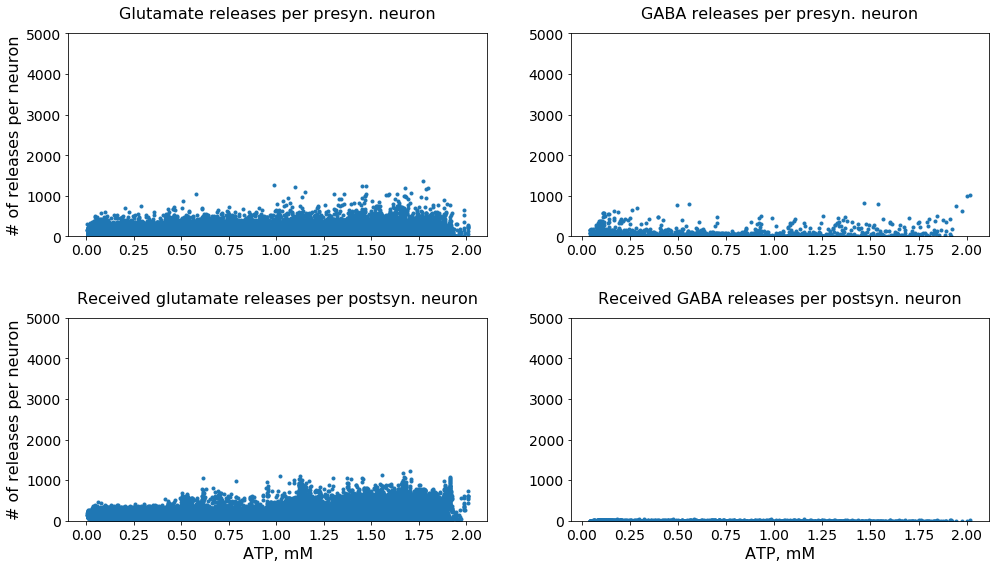

In [19]:
fig, axs = plt.subplots(2,2, figsize=(14,8))

ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]



ax1.plot(releases_params.loc[releases_params['mtype'].isin(['L5_TPC:A','L5_TPC:B','L5_TPC:C']),'atpi_mean'],releases_params.loc[releases_params['mtype'].isin(['L5_TPC:A','L5_TPC:B','L5_TPC:C']),'glut_releases_per_pre'],'.')
ax2.plot(releases_params.loc[releases_params['mtype'].isin(['L5_MC']),'atpi_mean'],releases_params.loc[releases_params['mtype'].isin(['L5_MC']),'gaba_releases_per_pre'],'.')
ax3.plot(releases_params.loc[releases_params['mtype'].isin(['L5_TPC:A','L5_TPC:B','L5_TPC:C']),'atpi_mean'],releases_params.loc[releases_params['mtype'].isin(['L5_TPC:A','L5_TPC:B','L5_TPC:C']),'glut_releases_received_per_post'],'.')
ax4.plot(releases_params.loc[releases_params['mtype'].isin(['L5_MC']),'atpi_mean'],releases_params.loc[releases_params['mtype'].isin(['L5_MC']),'gaba_releases_received_per_post'],'.')


#ax1.set_xlim([0, 2000])
#ax2.set_xlim([0, 2000])
#ax3.set_xlim([0, 2000])
#ax4.set_xlim([0, 2000])

ax1.set_ylim([0, 5000])
ax2.set_ylim([0, 5000])
ax3.set_ylim([0, 5000])
ax4.set_ylim([0, 5000])

#ax1.set_xlabel('ATP, mM',fontsize=16)
#ax2.set_xlabel('ATP, mM',fontsize=16)
ax3.set_xlabel('ATP, mM',fontsize=16)
ax4.set_xlabel('ATP, mM',fontsize=16)

ax1.set_ylabel('# of releases per neuron',fontsize=16)
#ax2.set_ylabel('# of releases per neuron',fontsize=16)
ax3.set_ylabel('# of releases per neuron',fontsize=16)
#ax4.set_ylabel('# of releases per neuron',fontsize=16)


ax1.set_title('Glutamate releases per presyn. neuron',fontsize=16, pad=15)
ax2.set_title('GABA releases per presyn. neuron',fontsize=16, pad=15)
ax3.set_title('Received glutamate releases per postsyn. neuron',fontsize=16, pad=15)
ax4.set_title('Received GABA releases per postsyn. neuron',fontsize=16, pad=15)



#ax.set_yticks([0, 10000, 20000])

plt.tight_layout()

plt.subplots_adjust(wspace=0.2, hspace=0.4)

#fig.savefig('plots/best/zoom_releases_vs_atp_12mar2021.pdf', dpi=300,bbox_inches='tight')
#fig.savefig('plots/best/zoom_releases_vs_atp_12mar2021.png', dpi=300,bbox_inches='tight')

plt.show()


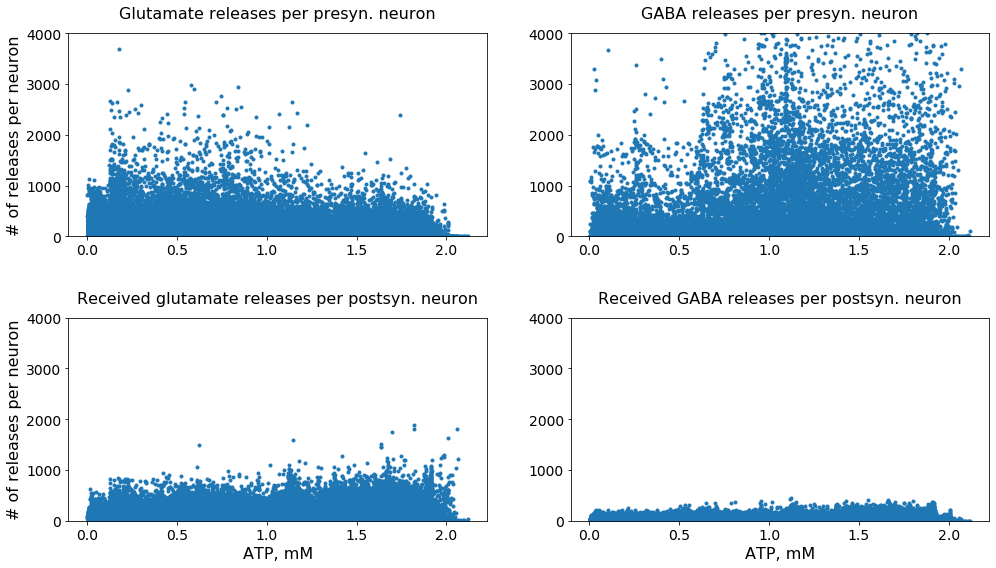

In [20]:
fig, axs = plt.subplots(2,2, figsize=(14,8))

ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]



ax1.plot(releases_params['atpi_mean'],releases_params['glut_releases_per_pre'],'.')
ax2.plot(releases_params['atpi_mean'],releases_params['gaba_releases_per_pre'],'.')
ax3.plot(releases_params['atpi_mean'],releases_params['glut_releases_received_per_post'],'.')
ax4.plot(releases_params['atpi_mean'],releases_params['gaba_releases_received_per_post'],'.')


#ax1.set_xlim([0, 2000])
#ax2.set_xlim([0, 2000])
#ax3.set_xlim([0, 2000])
#ax4.set_xlim([0, 2000])

ax1.set_ylim([0, 4000])
ax2.set_ylim([0, 4000])
ax3.set_ylim([0, 4000])
ax4.set_ylim([0, 4000])

#ax1.set_xlabel('ATP, mM',fontsize=16)
#ax2.set_xlabel('ATP, mM',fontsize=16)
ax3.set_xlabel('ATP, mM',fontsize=16)
ax4.set_xlabel('ATP, mM',fontsize=16)

ax1.set_ylabel('# of releases per neuron',fontsize=16)
#ax2.set_ylabel('# of releases per neuron',fontsize=16)
ax3.set_ylabel('# of releases per neuron',fontsize=16)
#ax4.set_ylabel('# of releases per neuron',fontsize=16)


ax1.set_title('Glutamate releases per presyn. neuron',fontsize=16, pad=15)
ax2.set_title('GABA releases per presyn. neuron',fontsize=16, pad=15)
ax3.set_title('Received glutamate releases per postsyn. neuron',fontsize=16, pad=15)
ax4.set_title('Received GABA releases per postsyn. neuron',fontsize=16, pad=15)



#ax.set_yticks([0, 10000, 20000])

plt.tight_layout()

plt.subplots_adjust(wspace=0.2, hspace=0.4)

#fig.savefig('plots/best/zoom_releases_vs_atp_12mar2021.pdf', dpi=300,bbox_inches='tight')
#fig.savefig('plots/best/zoom_releases_vs_atp_12mar2021.png', dpi=300,bbox_inches='tight')

plt.show()


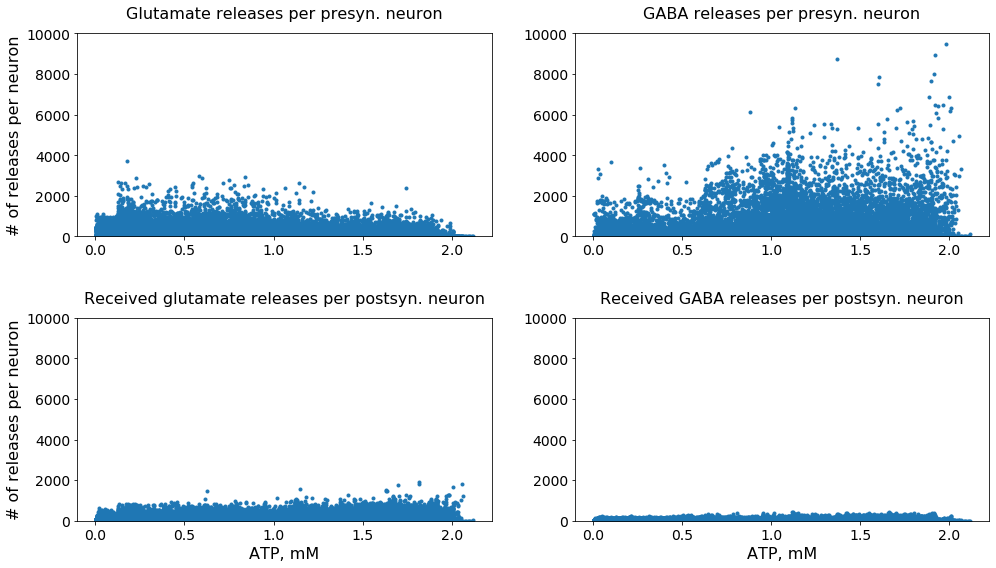

In [22]:
fig, axs = plt.subplots(2,2, figsize=(14,8))

ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]



ax1.plot(releases_params['atpi_mean'],releases_params['glut_releases_per_pre'],'.')
ax2.plot(releases_params['atpi_mean'],releases_params['gaba_releases_per_pre'],'.')
ax3.plot(releases_params['atpi_mean'],releases_params['glut_releases_received_per_post'],'.')
ax4.plot(releases_params['atpi_mean'],releases_params['gaba_releases_received_per_post'],'.')


#ax1.set_xlim([0, 2000])
#ax2.set_xlim([0, 2000])
#ax3.set_xlim([0, 2000])
#ax4.set_xlim([0, 2000])

ax1.set_ylim([0, 10000])
ax2.set_ylim([0, 10000])
ax3.set_ylim([0, 10000])
ax4.set_ylim([0, 10000])

#ax1.set_xlabel('ATP, mM',fontsize=16)
#ax2.set_xlabel('ATP, mM',fontsize=16)
ax3.set_xlabel('ATP, mM',fontsize=16)
ax4.set_xlabel('ATP, mM',fontsize=16)

ax1.set_ylabel('# of releases per neuron',fontsize=16)
#ax2.set_ylabel('# of releases per neuron',fontsize=16)
ax3.set_ylabel('# of releases per neuron',fontsize=16)
#ax4.set_ylabel('# of releases per neuron',fontsize=16)


ax1.set_title('Glutamate releases per presyn. neuron',fontsize=16, pad=15)
ax2.set_title('GABA releases per presyn. neuron',fontsize=16, pad=15)
ax3.set_title('Received glutamate releases per postsyn. neuron',fontsize=16, pad=15)
ax4.set_title('Received GABA releases per postsyn. neuron',fontsize=16, pad=15)



#ax.set_yticks([0, 10000, 20000])

plt.tight_layout()

plt.subplots_adjust(wspace=0.2, hspace=0.4)

#fig.savefig('plots/best/releases_vs_atp_12mar2021.pdf', dpi=300,bbox_inches='tight')
#fig.savefig('plots/best/releases_vs_atp_12mar2021.png', dpi=300,bbox_inches='tight')

plt.show()


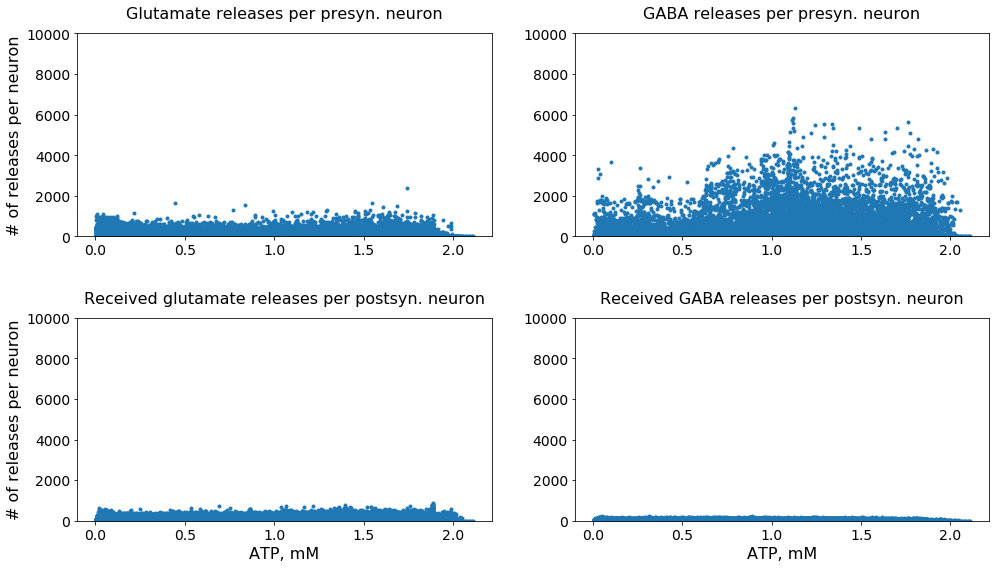

In [23]:
fig, axs = plt.subplots(2,2, figsize=(14,8))

ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]



ax1.plot(releases_params.loc[releases_params['idxm']>0,'atpi_mean'],releases_params.loc[releases_params['idxm']>0,'glut_releases_per_pre'],'.')
ax2.plot(releases_params.loc[releases_params['idxm']>0,'atpi_mean'],releases_params.loc[releases_params['idxm']>0,'gaba_releases_per_pre'],'.')
ax3.plot(releases_params.loc[releases_params['idxm']>0,'atpi_mean'],releases_params.loc[releases_params['idxm']>0,'glut_releases_received_per_post'],'.')
ax4.plot(releases_params.loc[releases_params['idxm']>0,'atpi_mean'],releases_params.loc[releases_params['idxm']>0,'gaba_releases_received_per_post'],'.')


#ax1.set_xlim([0, 2000])
#ax2.set_xlim([0, 2000])
#ax3.set_xlim([0, 2000])
#ax4.set_xlim([0, 2000])

ax1.set_ylim([0, 10000])
ax2.set_ylim([0, 10000])
ax3.set_ylim([0, 10000])
ax4.set_ylim([0, 10000])

#ax1.set_xlabel('ATP, mM',fontsize=16)
#ax2.set_xlabel('ATP, mM',fontsize=16)
ax3.set_xlabel('ATP, mM',fontsize=16)
ax4.set_xlabel('ATP, mM',fontsize=16)

ax1.set_ylabel('# of releases per neuron',fontsize=16)
#ax2.set_ylabel('# of releases per neuron',fontsize=16)
ax3.set_ylabel('# of releases per neuron',fontsize=16)
#ax4.set_ylabel('# of releases per neuron',fontsize=16)


ax1.set_title('Glutamate releases per presyn. neuron',fontsize=16, pad=15)
ax2.set_title('GABA releases per presyn. neuron',fontsize=16, pad=15)
ax3.set_title('Received glutamate releases per postsyn. neuron',fontsize=16, pad=15)
ax4.set_title('Received GABA releases per postsyn. neuron',fontsize=16, pad=15)



#ax.set_yticks([0, 10000, 20000])

plt.tight_layout()

plt.subplots_adjust(wspace=0.2, hspace=0.4)

#fig.savefig('plots/best/releases_vs_atp_12mar2021.pdf', dpi=300,bbox_inches='tight')
#fig.savefig('plots/best/releases_vs_atp_12mar2021.png', dpi=300,bbox_inches='tight')

plt.show()


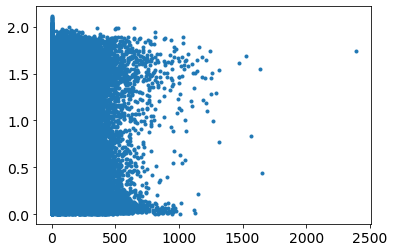

In [25]:
plt.plot(releases_params.loc[releases_params['idxm']>0,'glut_releases_per_pre'],releases_params.loc[releases_params['idxm']>0,'atpi_mean'],'.')
plt.show()

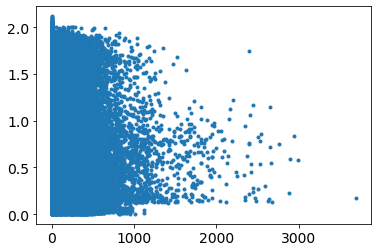

In [24]:
#new
plt.plot(releases_params['glut_releases_per_pre'],releases_params['atpi_mean'],'.')
plt.show()

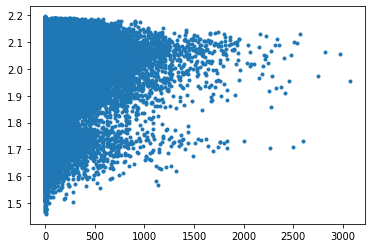

In [36]:
plt.plot(releases_params['glut_releases_per_pre'],releases_params['atpi_mean'],'.')
plt.show()

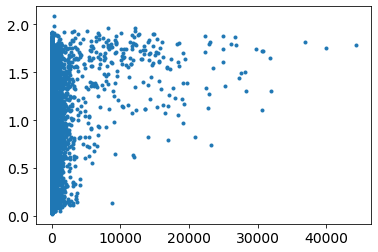

In [54]:
# new
plt.plot(releases_params['gaba_releases_per_pre'],releases_params['atpi_mean'],'.')
plt.show()

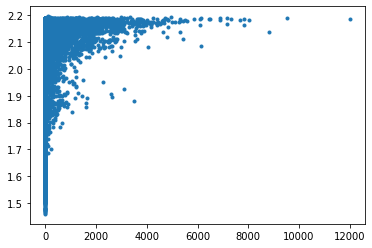

In [38]:
plt.plot(releases_params['gaba_releases_per_pre'],releases_params['atpi_mean'],'.')
plt.show()

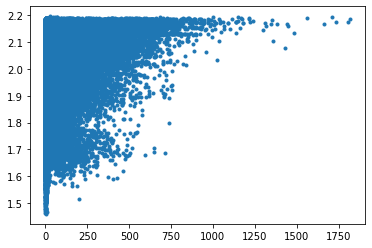

In [37]:
plt.plot(releases_params['glut_releases_received_per_post'],releases_params['atpi_mean'],'.')
plt.show()


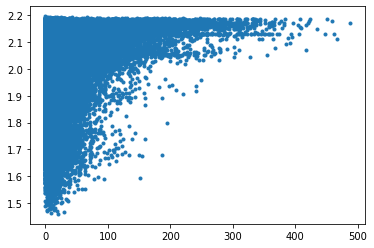

In [39]:
plt.plot(releases_params['gaba_releases_received_per_post'],releases_params['atpi_mean'],'.')
plt.show()


In [ ]:
report = sim.report('KConcAllCmps', source='h5')
KConcAllCmps = report.get()
KConcAllCmps = KConcAllCmps.reset_index()

In [32]:
report = sim.report('NaConcAllCmps', source='h5')
NaConcAllCmps = report.get()
NaConcAllCmps = NaConcAllCmps.reset_index()
